# Project 2 

#### data is availiable on dataworld, url: https://data.world/jaypeedevlin/lending-club-loan-data-2007-11
#### This project aims to use Machine Learning to predict the loan status.

 Citation: 
 
 ECON628 lecture notes
 
 Lending up machine learning tutorial

In [1]:
#import data modules 
import numpy as np
import scipy.stats as stats
import pandas as pd

#import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

The excel file contains two sheets, sheet1--data; sheet2-- data description.

# Part 1: EDA

In [2]:
### loading sheet 1
loans = pd.read_csv('/Users/zerindong/Desktop/ECON628-01-zerin5577/projects/jaypeedevlin-lending-club-loan-data-2007-11/lending_club_loans.csv', skiprows=1) 

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
### rows and columns
loans.shape

(42538, 115)

In [4]:
loans.describe().T

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
member_id,42535.0,825702.551170,279540.905635,70473.00,NaN,NaN,NaN,1.314167e+06
loan_amnt,42535.0,11089.722581,7410.938391,500.00,NaN,NaN,NaN,3.500000e+04
funded_amnt,42535.0,10821.585753,7146.914675,500.00,NaN,NaN,NaN,3.500000e+04
funded_amnt_inv,42535.0,10139.830603,7131.686447,0.00,NaN,NaN,NaN,3.500000e+04
installment,42535.0,322.623063,208.927216,15.67,NaN,NaN,NaN,1.305190e+03
annual_inc,42531.0,69136.556420,64096.349719,1896.00,NaN,NaN,NaN,6.000000e+06
dti,42535.0,13.373043,6.726315,0.00,NaN,NaN,NaN,2.999000e+01
delinq_2yrs,42506.0,0.152449,0.512406,0.00,NaN,NaN,NaN,1.300000e+01
fico_range_low,42535.0,713.052545,36.188439,610.00,NaN,NaN,NaN,8.250000e+02
fico_range_high,42535.0,717.052545,36.188439,614.00,NaN,NaN,NaN,8.290000e+02


In [5]:
### sum the missing values
loans.isnull().sum()

id                                    0
member_id                             3
loan_amnt                             3
funded_amnt                           3
funded_amnt_inv                       3
term                                  3
int_rate                              3
installment                           3
grade                                 3
sub_grade                             3
emp_title                          2627
emp_length                            3
home_ownership                        3
annual_inc                            7
verification_status                   3
issue_d                               3
loan_status                           3
pymnt_plan                            3
url                                   3
desc                              13295
purpose                               3
title                                15
zip_code                              3
addr_state                            3
dti                                   3


Drop the columns that containing more than 50% missing values.

In [6]:
### drop the columns that including too many missing values (threshold--50% missing)
half_loans= len(loans) / 2
loans= loans.dropna(thresh=half_loans,axis=1)
### drop the columns that are not helpful at all
loans= loans.drop(['url','desc'],axis=1)

In [7]:
loans.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [8]:
### print out the shape of the dataset --- rows, cols
loans.shape

(42538, 56)

In [9]:
### loading sheet2
desc = pd.read_csv('/Users/zerindong/Desktop/ECON628-01-zerin5577/projects/jaypeedevlin-lending-club-loan-data-2007-11/LCDataDictionary.csv',low_memory=False) 

In [10]:
desc.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [11]:
desc.shape

(117, 2)

In [12]:
## rename the columns
desc= desc.rename(columns={'LoanStatNew': 'name',
                           'Description': 'description'})

In [13]:
desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
name           115 non-null object
description    116 non-null object
dtypes: object(2)
memory usage: 1.9+ KB


In [14]:
### merge sheet 1 (variable name) and sheet2 (description)
### drop redundant columns

loans_dtypes = pd.DataFrame(loans.dtypes,columns=['dtypes'])
loans_dtypes = loans_dtypes.reset_index()
loans_dtypes['name'] = loans_dtypes['index']
loans_dtypes = loans_dtypes[['name','dtypes']]

view = loans_dtypes.merge(desc, on='name',how='left') 

In [82]:
view

,name,dtypes,description
0,id,object,A unique LC assigned ID for the loan listing.
1,member_id,float64,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,The listed amount of the loan applied for by t...
3,funded_amnt,float64,The total amount committed to that loan at tha...
4,funded_amnt_inv,float64,The total amount committed by investors for th...
5,term,object,The number of payments on the loan. Values are...
6,int_rate,object,Interest Rate on the loan
7,installment,float64,The monthly payment owed by the borrower if th...
8,grade,object,LC assigned loan grade
9,sub_grade,object,LC assigned loan subgrade


In [16]:
### check the missing values
loans.isnull().sum()

id                               0
member_id                        3
loan_amnt                        3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
grade                            3
sub_grade                        3
emp_title                     2627
emp_length                       3
home_ownership                   3
annual_inc                       7
verification_status              3
issue_d                          3
loan_status                      3
pymnt_plan                       3
purpose                          3
title                           15
zip_code                         3
addr_state                       3
dti                              3
delinq_2yrs                     32
earliest_cr_line                32
fico_range_low                   3
fico_range_high                  3
inq_last_6mths                  32
open_acc            

In [17]:
### drop the columns that not being helpful for this analysis
loans.drop(['id','member_id','emp_title','pub_rec_bankruptcies','issue_d','sub_grade','funded_amnt','funded_amnt_inv',
            'zip_code','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
            'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
            'collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','last_credit_pull_d',
            'earliest_cr_line','pymnt_plan','policy_code','acc_now_delinq','delinq_amnt','application_type',
            'initial_list_status','title'
    ],axis=1, inplace=True)

In [18]:
loans.isnull().sum()

loan_amnt                3
term                     3
int_rate                 3
installment              3
grade                    3
emp_length               3
home_ownership           3
annual_inc               7
verification_status      3
loan_status              3
purpose                  3
addr_state               3
dti                      3
delinq_2yrs             32
fico_range_low           3
fico_range_high          3
inq_last_6mths          32
open_acc                32
pub_rec                 32
revol_bal                3
total_acc               32
last_fico_range_high     3
last_fico_range_low      3
dtype: int64

From the table above, we can see that we still have some missing values in the dataset. In order to imporve the accuracy of the analysis, we will drop the rows that including a missing values.

In [19]:
### drop the rows that contain missing value
loans =loans.dropna()

In [20]:
loans.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
total_acc               0
last_fico_range_high    0
last_fico_range_low     0
dtype: int64

In [21]:
loans.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,last_fico_range_high,last_fico_range_low
0,5000.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,...,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,9.0,744.0,740.0
1,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,4.0,499.0,0.0
2,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,10.0,719.0,715.0
3,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,37.0,604.0,600.0
4,3000.0,60 months,12.69%,67.79,B,1 year,RENT,80000.0,Source Verified,Current,...,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,38.0,694.0,690.0


In [22]:
### modify data type, string to int/float
cols = ['grade', 'emp_length', 'term']
for name in cols:
    print name
    print loans[name].value_counts(),'\n'

grade
B    12379
A    10172
C     8734
D     6015
E     3393
F     1301
G      512
Name: grade, dtype: int64 

emp_length
10+ years    9366
< 1 year     5044
2 years      4742
3 years      4362
4 years      3649
1 year       3592
5 years      3458
6 years      2374
7 years      1875
8 years      1592
9 years      1340
n/a          1112
Name: emp_length, dtype: int64 

term
 36 months    31505
 60 months    11001
Name: term, dtype: int64 



In [23]:
loans['int_rate']=loans['int_rate'].str.replace('%','')
loans.int_rate = loans.int_rate.convert_objects(convert_numeric=True)

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [24]:
loans['grade']=loans['grade'].str.replace('A','1')
loans['grade']=loans['grade'].str.replace('B','2')
loans['grade']=loans['grade'].str.replace('C','3')
loans['grade']=loans['grade'].str.replace('D','4')
loans['grade']=loans['grade'].str.replace('E','5')
loans['grade']=loans['grade'].str.replace('F','6')
loans['grade']=loans['grade'].str.replace('G','7')
loans.grade = loans.grade.convert_objects(convert_numeric=True)

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [25]:
### replace the values in variale "emp_length"
loans_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
        }
    }
    
loans = loans.replace(loans_dict)

In [26]:
loans.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,last_fico_range_high,last_fico_range_low
0,5000.0,36 months,10.65,162.87,2,10,RENT,24000.0,Verified,Fully Paid,...,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,9.0,744.0,740.0
1,2500.0,60 months,15.27,59.83,3,0,RENT,30000.0,Source Verified,Charged Off,...,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,4.0,499.0,0.0
2,2400.0,36 months,15.96,84.33,3,10,RENT,12252.0,Not Verified,Fully Paid,...,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,10.0,719.0,715.0
3,10000.0,36 months,13.49,339.31,3,10,RENT,49200.0,Source Verified,Fully Paid,...,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,37.0,604.0,600.0
4,3000.0,60 months,12.69,67.79,2,1,RENT,80000.0,Source Verified,Current,...,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,38.0,694.0,690.0


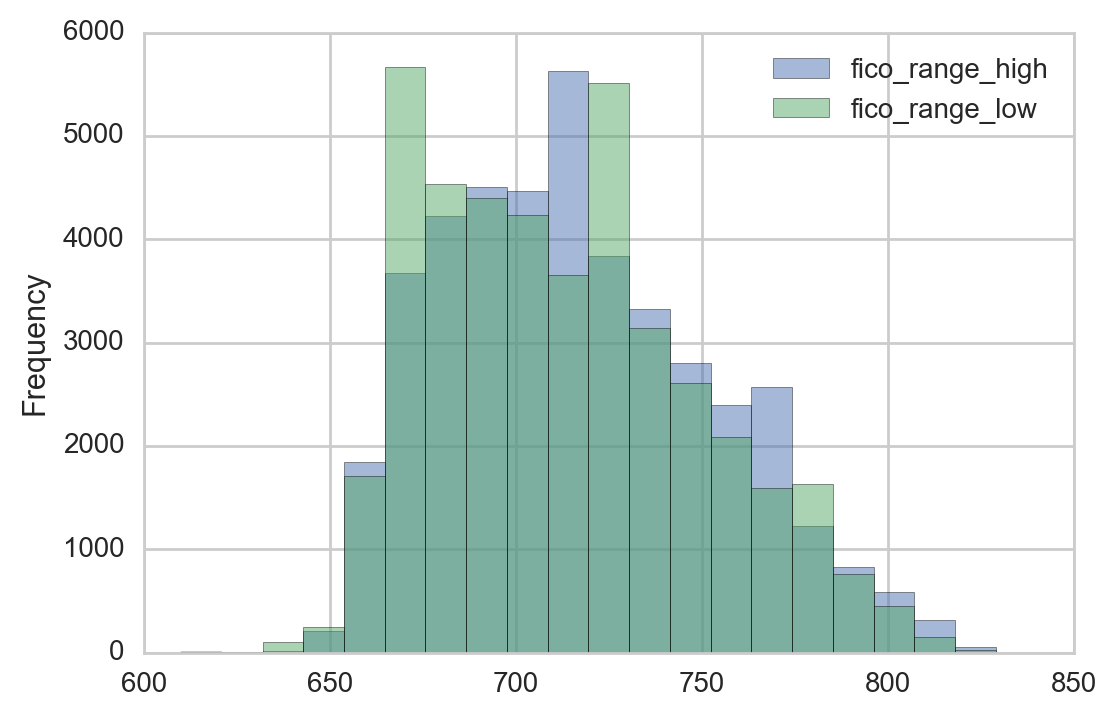

In [27]:
### Let's first look at the scale of the FICO score

fico_columns = ['fico_range_high','fico_range_low']


loans[fico_columns].plot.hist(alpha=0.5,bins=20);

According to the graph above, we can the difference between "fico_high" and "fico_low". In this case, we use the average for the later analysis.

In [28]:
### take the average of FICO score
loans['fico_average'] = (loans['fico_range_high'] + loans['fico_range_low']) / 2

In [29]:
cols = ['fico_range_low','fico_range_high','fico_average']
loans[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
fico_range_low,42506.0,713.044982,36.182005,610.0,685.0,710.0,740.0,825.0
fico_range_high,42506.0,717.044982,36.182005,614.0,689.0,714.0,744.0,829.0
fico_average,42506.0,715.044982,36.182005,612.0,687.0,712.0,742.0,827.0


In [30]:
### create a list of the columns that we want to drop, then drop the list
drop_col=['fico_range_high','fico_range_low','last_fico_range_low','last_fico_range_high']
loans=loans.drop(drop_col,axis=1)

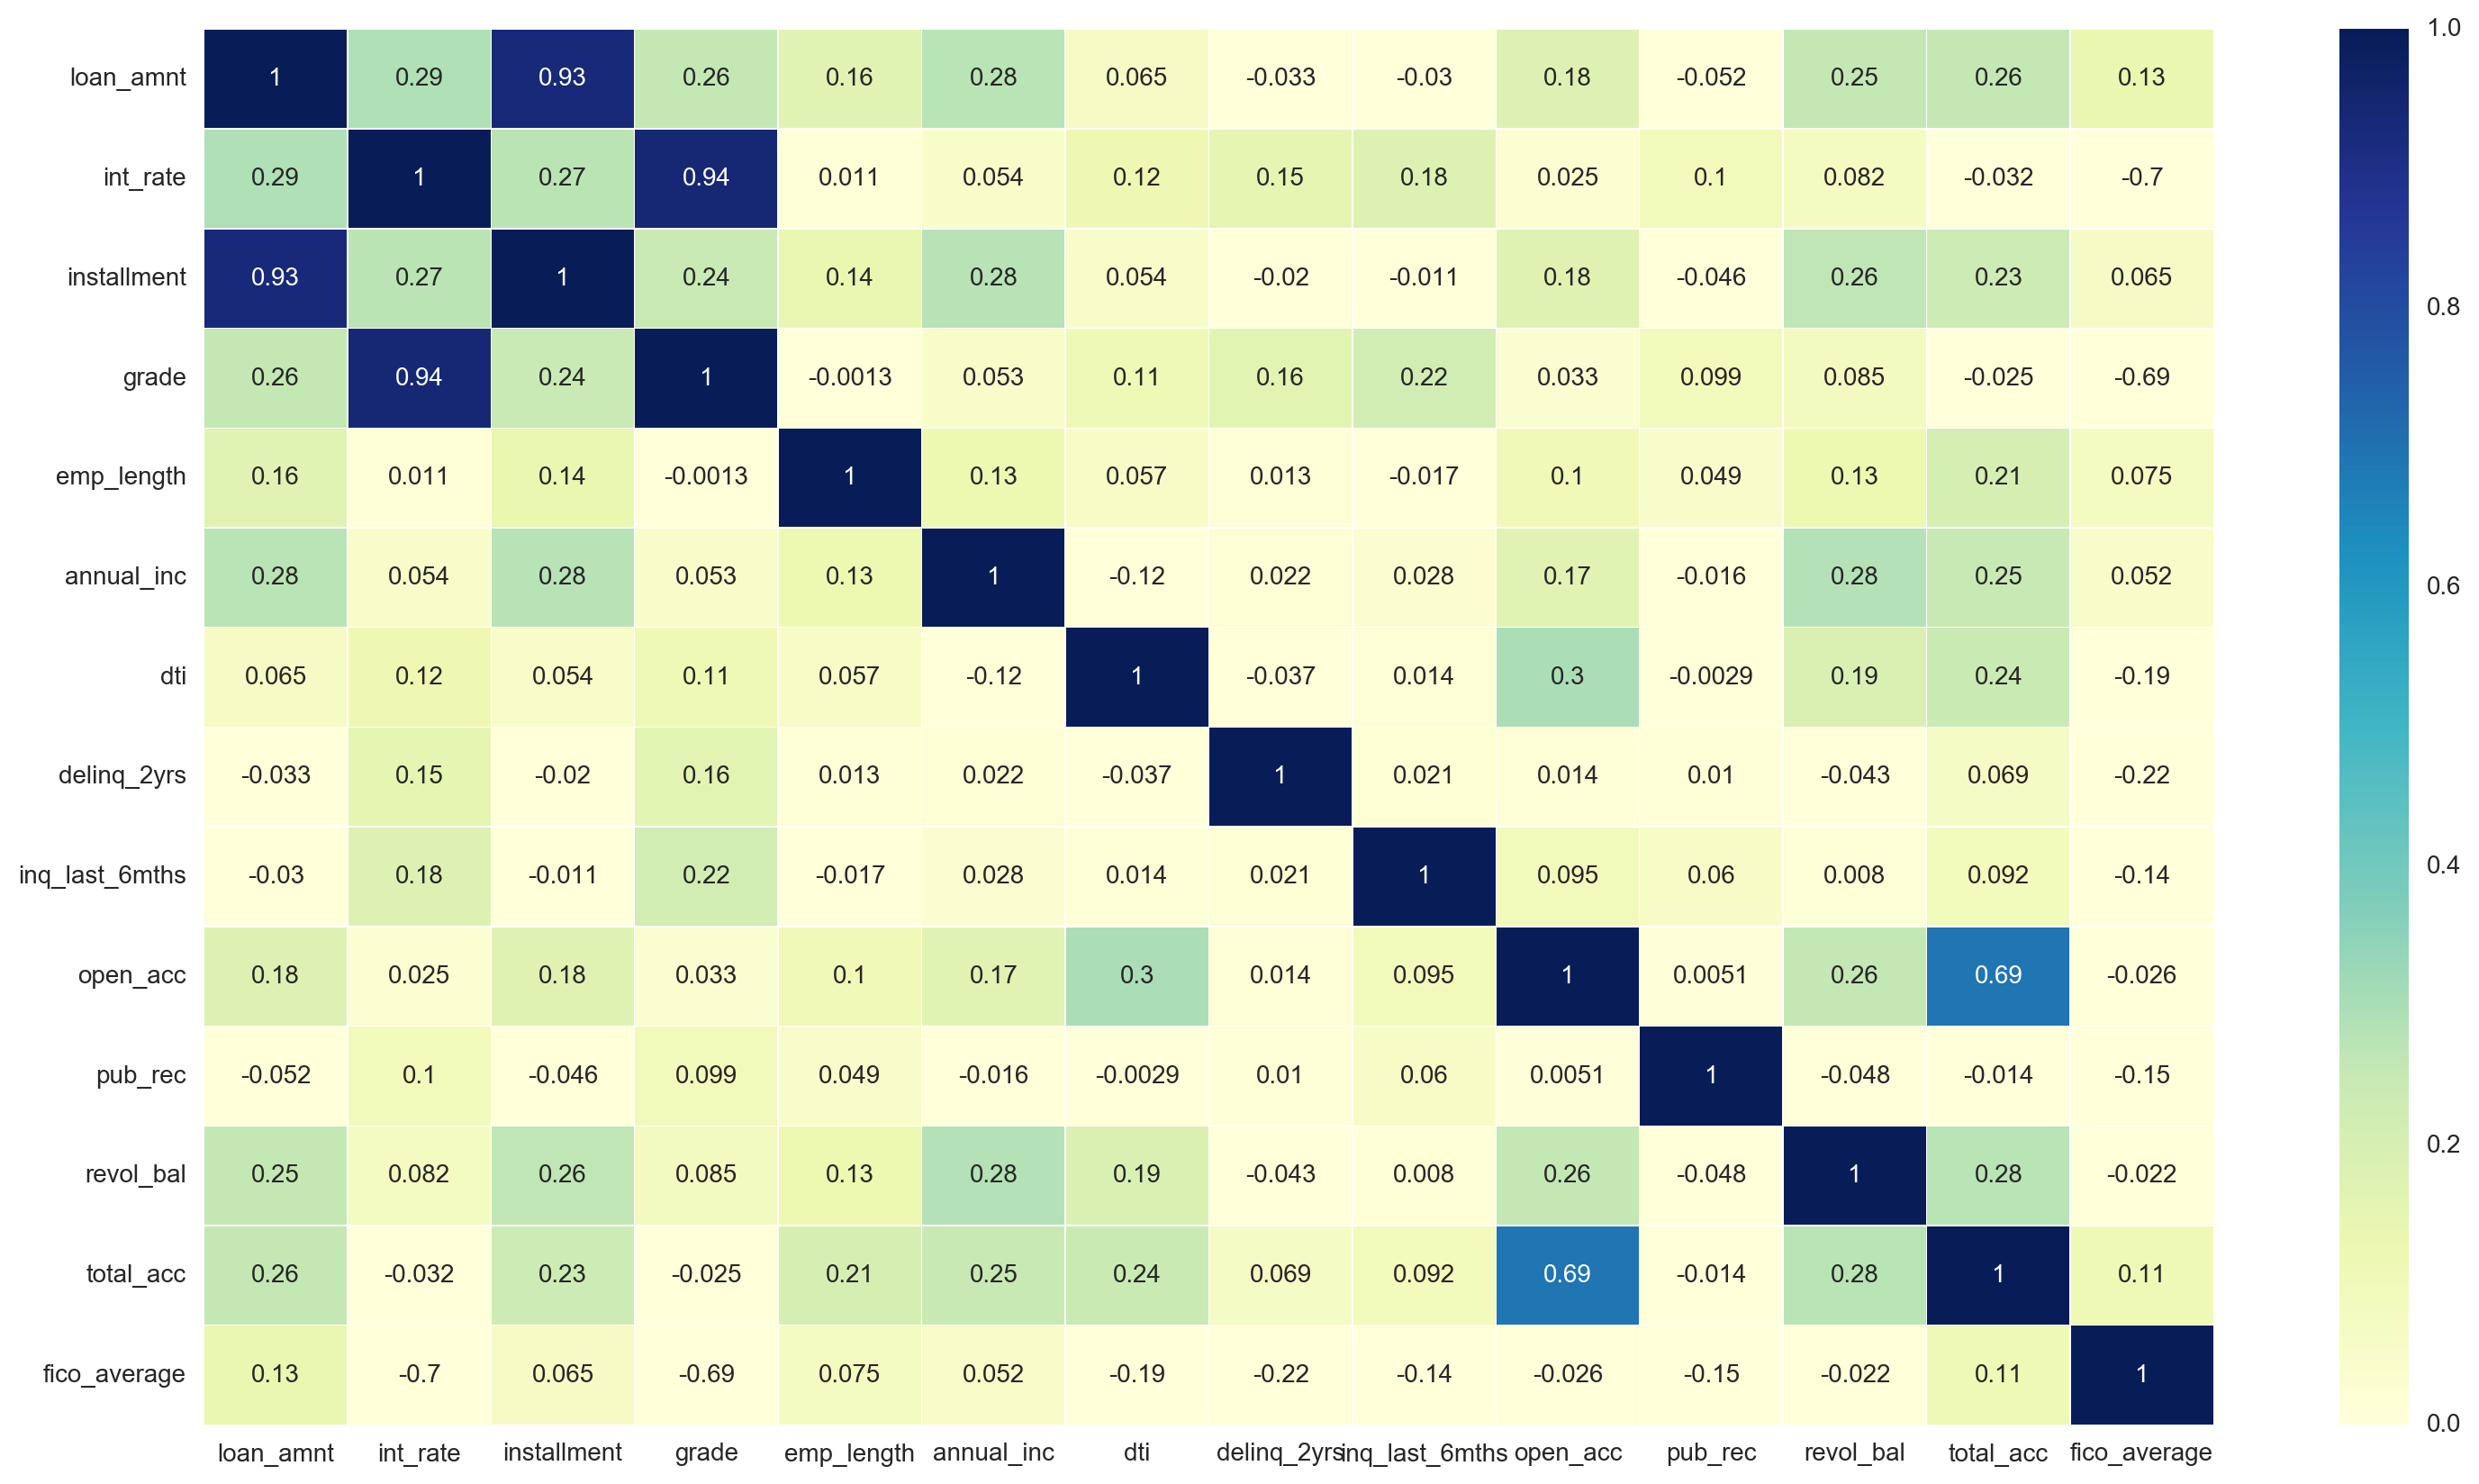

In [31]:
### correlation matrix
### first reach out for the potential variables

fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(loans.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

To know customer's behaviors better, let group them by certain features.

In [32]:
loans.groupby(['purpose'], sort=True)[['loan_amnt']].sum().sort_values(by=['loan_amnt'],ascending=False).reset_index()

,purpose,loan_amnt
0,debt_consolidation,248374950.0
1,credit_card,63615000.0
2,home_improvement,36449750.0
3,other,35020100.0
4,small_business,27211075.0
5,major_purchase,18676125.0
6,car,10917925.0
7,wedding,9791700.0
8,medical,6137150.0
9,house,5360625.0


The top three purpose of borrowing are Debt Consolidation, Credit Card and Home Inprovement. 

In [33]:
loans.groupby(['addr_state'], sort=True)[['loan_amnt']].sum().sort_values(by=['loan_amnt'],ascending=False).reset_index()

,addr_state,loan_amnt
0,CA,83825875.0
1,NY,45328050.0
2,TX,33750925.0
3,FL,32891850.0
4,NJ,23079825.0
5,IL,19028675.0
6,PA,17336075.0
7,VA,17069625.0
8,GA,16811500.0
9,MA,16156475.0


Top three States: California, New York and Texas, which are also the largest three states in the US by population. 

In [34]:
loans["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1962
Does not meet the credit policy. Status:Charged Off      758
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [35]:
### create a dummy variable based on " loan status" 
mapping_dict = {'loan_status':{'Fully Paid':1,'Charged Off': 0,'Late (16-30 days)':0 ,'Late (31-120 days)': 0,'Default': 0}}
loans = loans.replace(mapping_dict)
loans = loans[(loans['loan_status'] == 1) | (loans['loan_status'] == 0)]

In [36]:
loans.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,fico_average
0,5000.0,36 months,10.65,162.87,2,10,RENT,24000.0,Verified,1,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,9.0,737.0
1,2500.0,60 months,15.27,59.83,3,0,RENT,30000.0,Source Verified,0,car,GA,1.00,0.0,5.0,3.0,0.0,1687.0,4.0,742.0
2,2400.0,36 months,15.96,84.33,3,10,RENT,12252.0,Not Verified,1,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,10.0,737.0
3,10000.0,36 months,13.49,339.31,3,10,RENT,49200.0,Source Verified,1,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,37.0,692.0
5,5000.0,36 months,7.90,156.46,1,3,RENT,36000.0,Source Verified,1,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963.0,12.0,732.0


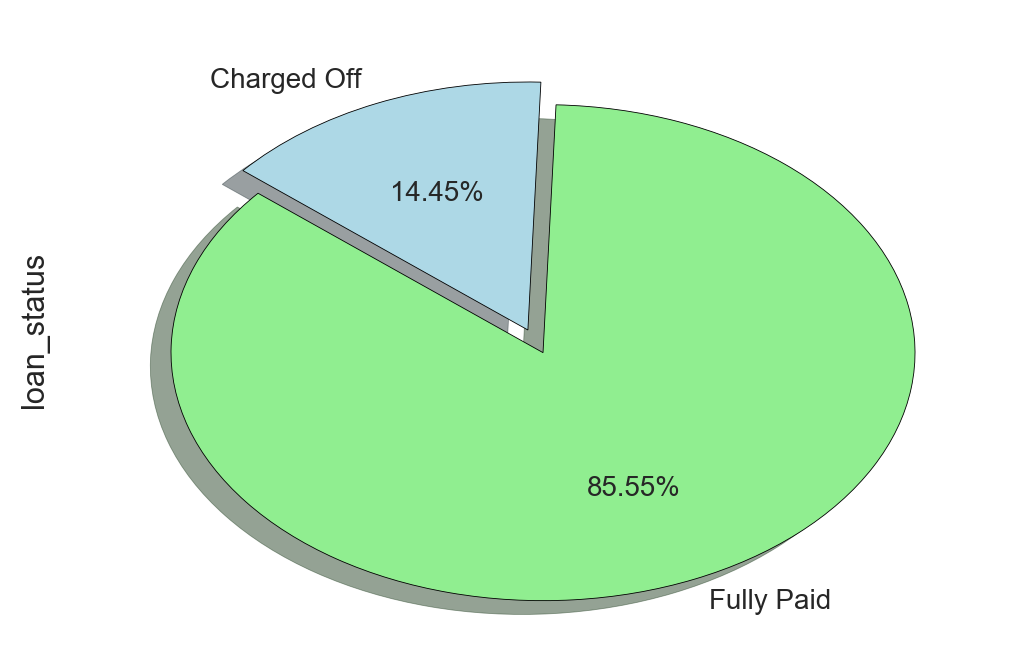

In [37]:
# Data to plot
labels = 'Fully Paid','Charged Off'
colors = ['lightgreen', 'lightblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
loans.loan_status.value_counts().plot.pie(explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140)
plt.show()

In [38]:
### save the cleaned dataset for the further uses.
loans.to_csv("/Users/zerindong/Desktop/ECON628-01-zerin5577/projects/cleaned_loans.csv",index=False)

# Part 2. Machine Learning

In [39]:
### loading cleaned dataset
df = pd.read_csv('/Users/zerindong/Desktop/ECON628-01-zerin5577/projects/cleaned_loans.csv',low_memory=False) 

In [40]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,fico_average
0,5000.0,36 months,10.65,162.87,2,10,RENT,24000.0,Verified,1,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,9.0,737.0
1,2500.0,60 months,15.27,59.83,3,0,RENT,30000.0,Source Verified,0,car,GA,1.00,0.0,5.0,3.0,0.0,1687.0,4.0,742.0
2,2400.0,36 months,15.96,84.33,3,10,RENT,12252.0,Not Verified,1,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,10.0,737.0
3,10000.0,36 months,13.49,339.31,3,10,RENT,49200.0,Source Verified,1,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,37.0,692.0
4,5000.0,36 months,7.90,156.46,1,3,RENT,36000.0,Source Verified,1,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963.0,12.0,732.0


Since some of the features are string variales. We need to re-code them.

In [41]:
### re-code variables as dummy according to their characteristics

dum_columns = ['home_ownership','verification_status','purpose','term']
dummy_df = pd.get_dummies(df[dum_columns]).astype(np.int8)
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(dum_columns, axis=1)
df.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,addr_state,dti,delinq_2yrs,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,2,10,24000.0,1,AZ,27.65,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,15.27,59.83,3,0,30000.0,0,GA,1.00,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,84.33,3,10,12252.0,1,IL,8.72,0.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,13.49,339.31,3,10,49200.0,1,CA,20.00,0.0,...,0,0,0,1,0,0,0,0,1,0
4,5000.0,7.90,156.46,1,3,36000.0,1,AZ,11.20,0.0,...,0,0,0,0,0,0,0,1,1,0


In [42]:
df=df.drop(['addr_state'],axis=1)

In [43]:
### save the cleaned dataset for the further uses.
df.to_csv("/Users/zerindong/Desktop/ECON628-01-zerin5577/projects/LC_loans.csv",index=False)

In [44]:
df.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,2,10,24000.0,1,27.65,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,15.27,59.83,3,0,30000.0,0,1.00,0.0,5.0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,84.33,3,10,12252.0,1,8.72,0.0,2.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,13.49,339.31,3,10,49200.0,1,20.00,0.0,1.0,...,0,0,0,1,0,0,0,0,1,0
4,5000.0,7.90,156.46,1,3,36000.0,1,11.20,0.0,3.0,...,0,0,0,0,0,0,0,1,1,0


### Logistic Regression

In [45]:
columns_ = df.columns.tolist()
exclude_cols = ['loan_status']

y = df.loan_status.values

X = df[[i for i in columns_ if i not in exclude_cols]]
print y.shape, X.shape

(39257,) (39257, 38)


In [46]:
### split the dataset into train and test
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(27479, 38) (27479,)
(11778, 38) (11778,)


In [47]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logistic, search_parameters, cv=5, verbose=1, n_jobs=-1)

In [48]:
estimator.fit(X_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 43.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

### Model Evaluation

In [49]:
log_best = estimator.best_estimator_
print "Best estimators on the left out data:\n", log_best

print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C 
# This estimator.best_estimator_ object has many great reporting metrics
## Estimator that was chosen by the search, i.e. 
## estimator which gave highest score (or smallest loss if specified) on the left out data. 
## Not available if refit=False.

print "\nBest Params on hold out data (train):\n", estimator.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % estimator.best_score_
## Score of best_estimator on the left out data.

Best estimators on the left out data:
LogisticRegression(C=1.8329807108324359, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=2, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Best C / Regularization Param on the left out data:
1.83298071083

Best Params on hold out data (train):
{'C': 1.8329807108324359, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None}

Best Score on left out data:0.855 



In [50]:
from sklearn.metrics import confusion_matrix
y_pred=estimator.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 ', 'True_Label_1'],
                         columns=['Predict_Label_0', 'Predict_Label_1'])

confusion

,Predict_Label_0,Predict_Label_1
True_Label_0,27,1664
True_Label_1,30,10057


In [51]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.47      0.02      0.03      1691
          1       0.86      1.00      0.92     10087

avg / total       0.80      0.86      0.79     11778



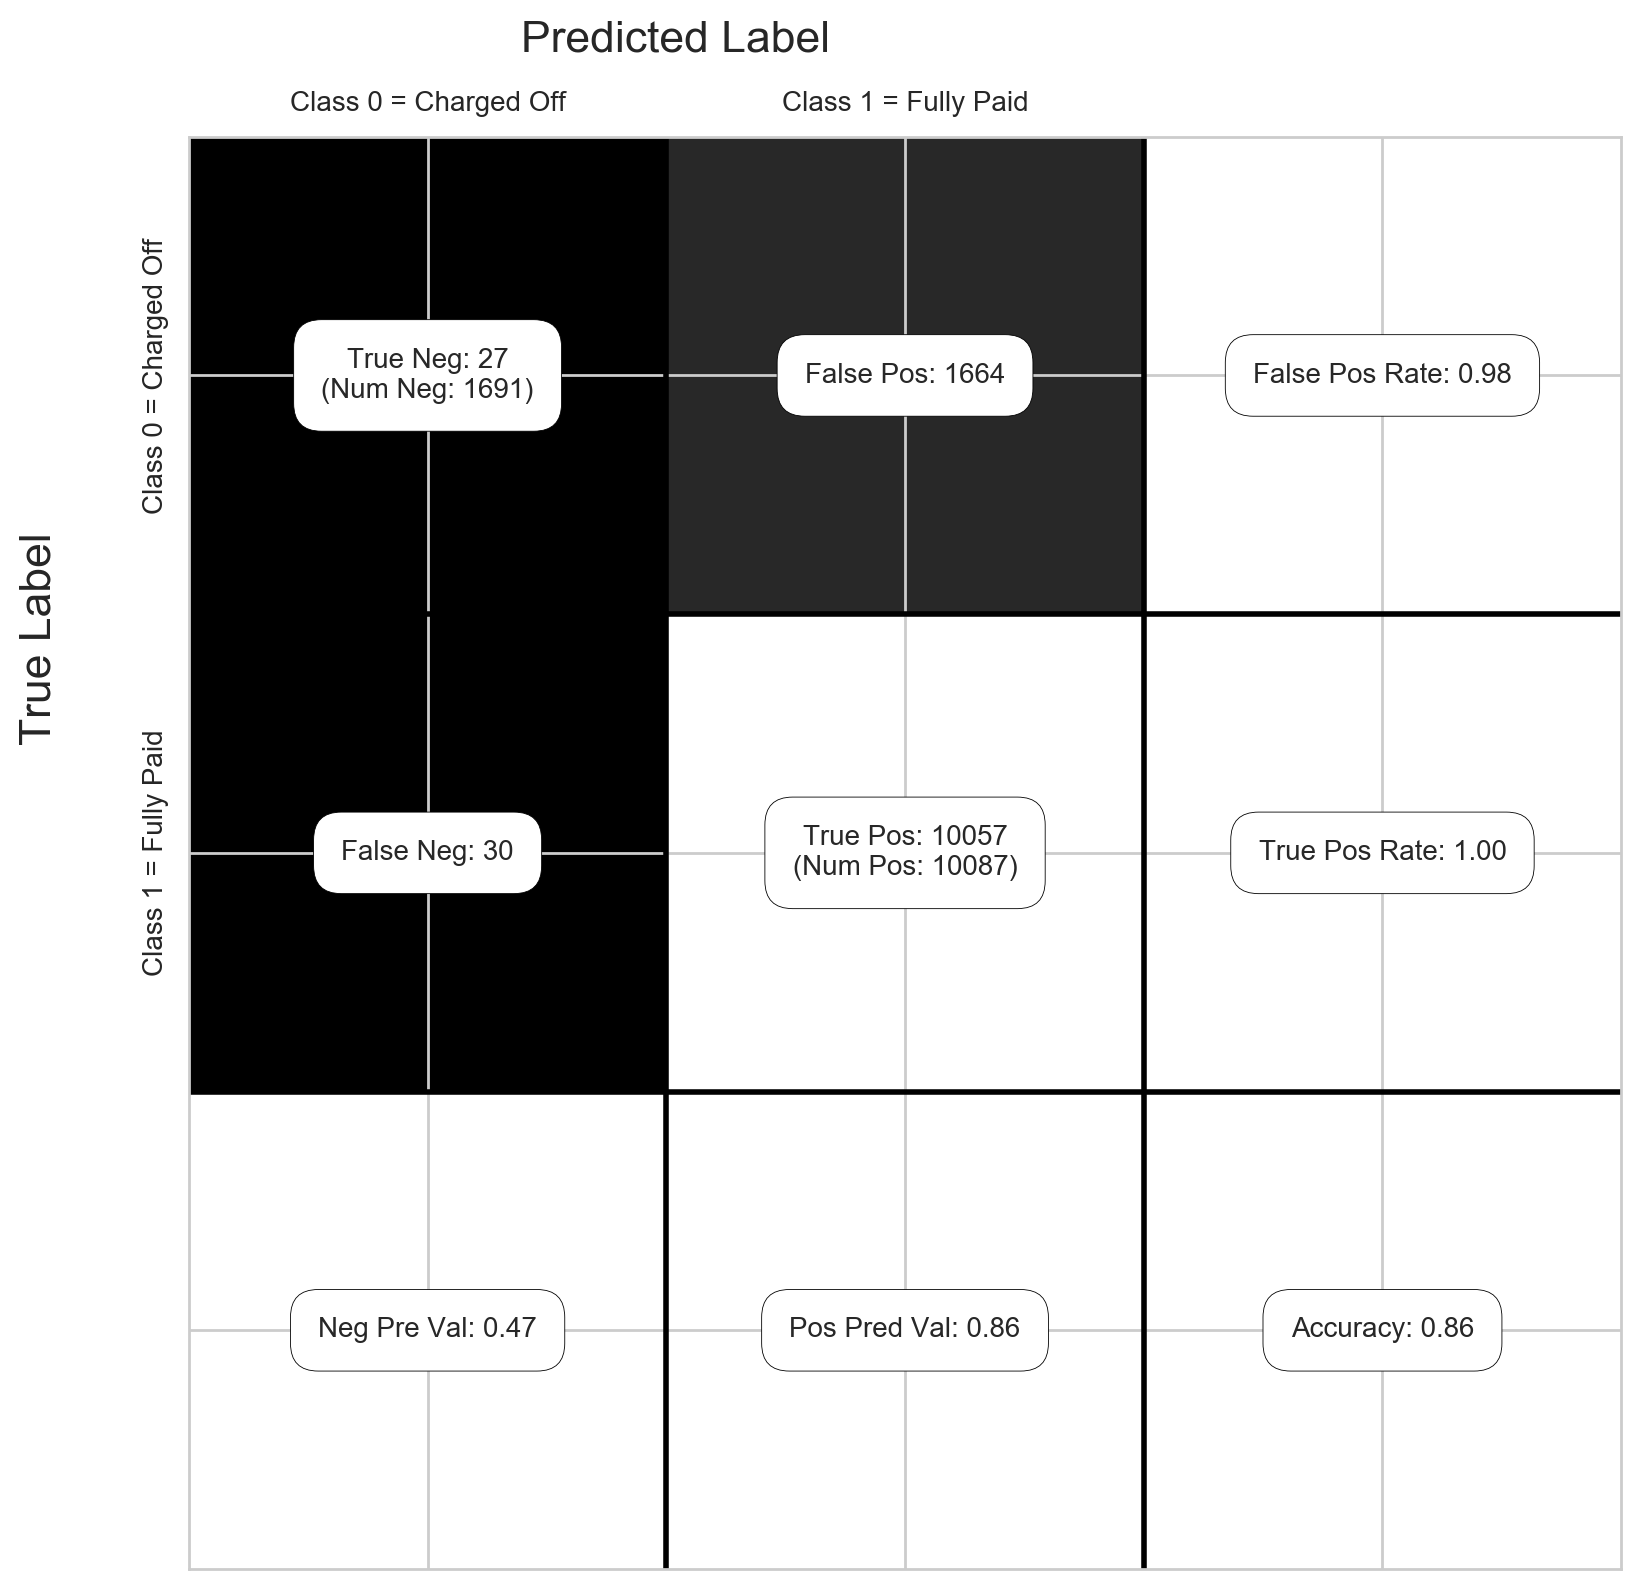

In [52]:
import imp
confusion = imp.load_source('confussion', '../utils/stats/confussion.py')

from confussion import show_confusion_matrix

C = confusion_matrix(y_test, estimator.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Charged Off', 'Class 1 = Fully Paid'])

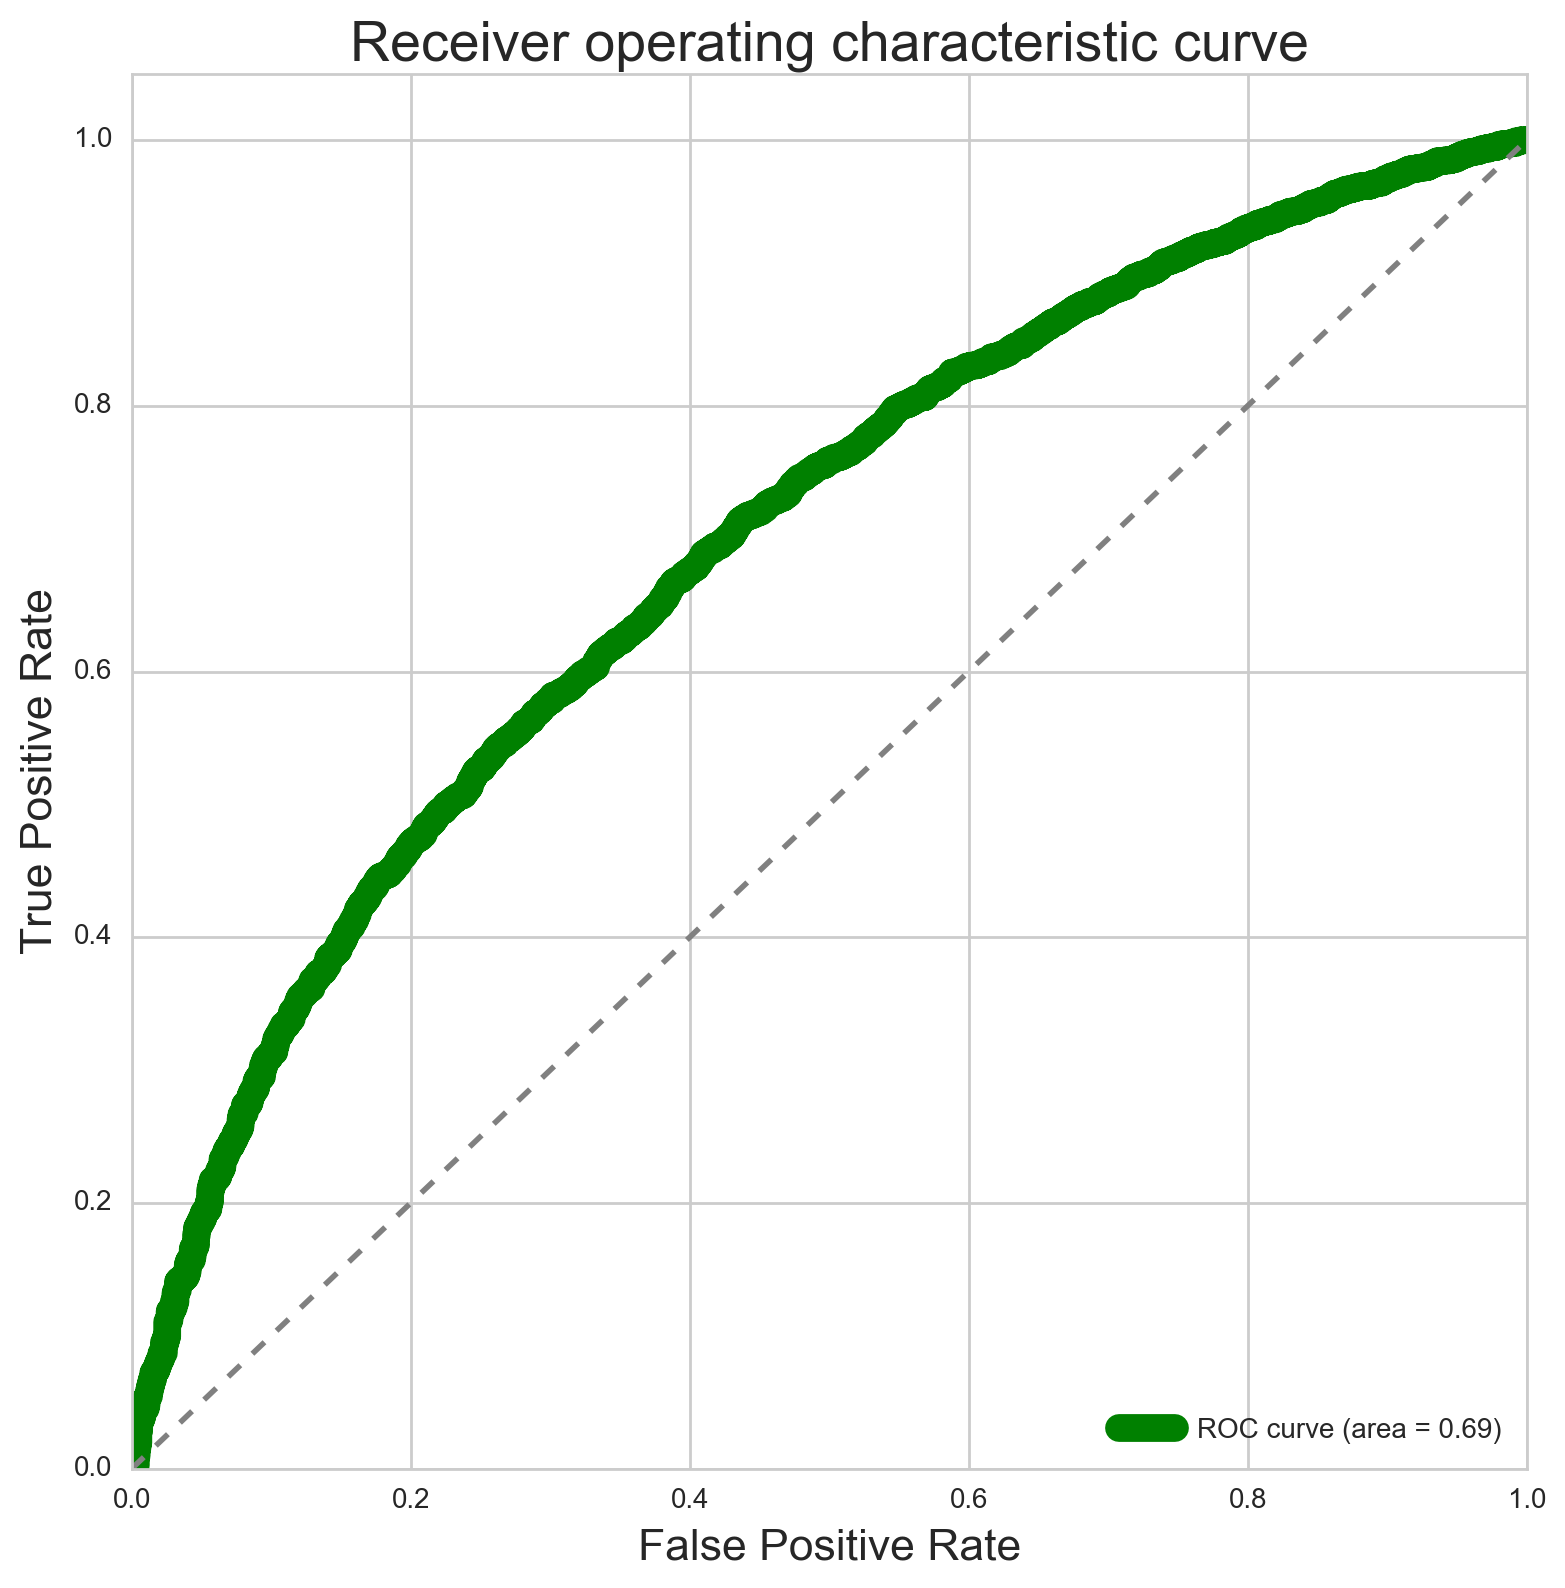

In [53]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = estimator.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

## Decison Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7]
         }
    
gsdt = GridSearchCV(dec_tree, params, n_jobs=-1, cv=5, verbose=1)

In [55]:
gsdt.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   34.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

### Model Evaluation 

In [56]:
dct_best = gsdt.best_estimator_
print "Best estimators on the left out data:\n", dct_best
print ''

print "\nBest Params on hold out data (train):\n", gsdt.best_params_
##Parameter setting that gave the best results on the hold out data.
print ''

print "\nBest Score on left out data:%.3f \n" % gsdt.best_score_
## Score of best_estimator on the left out data.
print ''

Best estimators on the left out data:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Best Params on hold out data (train):
{'max_features': 'auto', 'min_samples_split': 2, 'max_depth': 5, 'min_samples_leaf': 10}


Best Score on left out data:0.855 




In [57]:
y_pred= gsdt.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Charged Off', 'True_Label_1 Fully Paid'],
                         columns=['Predict_Label_0 Charged Off', 'Predict_Label_1 Fully Paid'])

confusion

,Predict_Label_0 Charged Off,Predict_Label_1 Fully Paid
True_Label_0 Charged Off,5,1686
True_Label_1 Fully Paid,12,10075


In [58]:
cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.29      0.00      0.01      1691
          1       0.86      1.00      0.92     10087

avg / total       0.78      0.86      0.79     11778



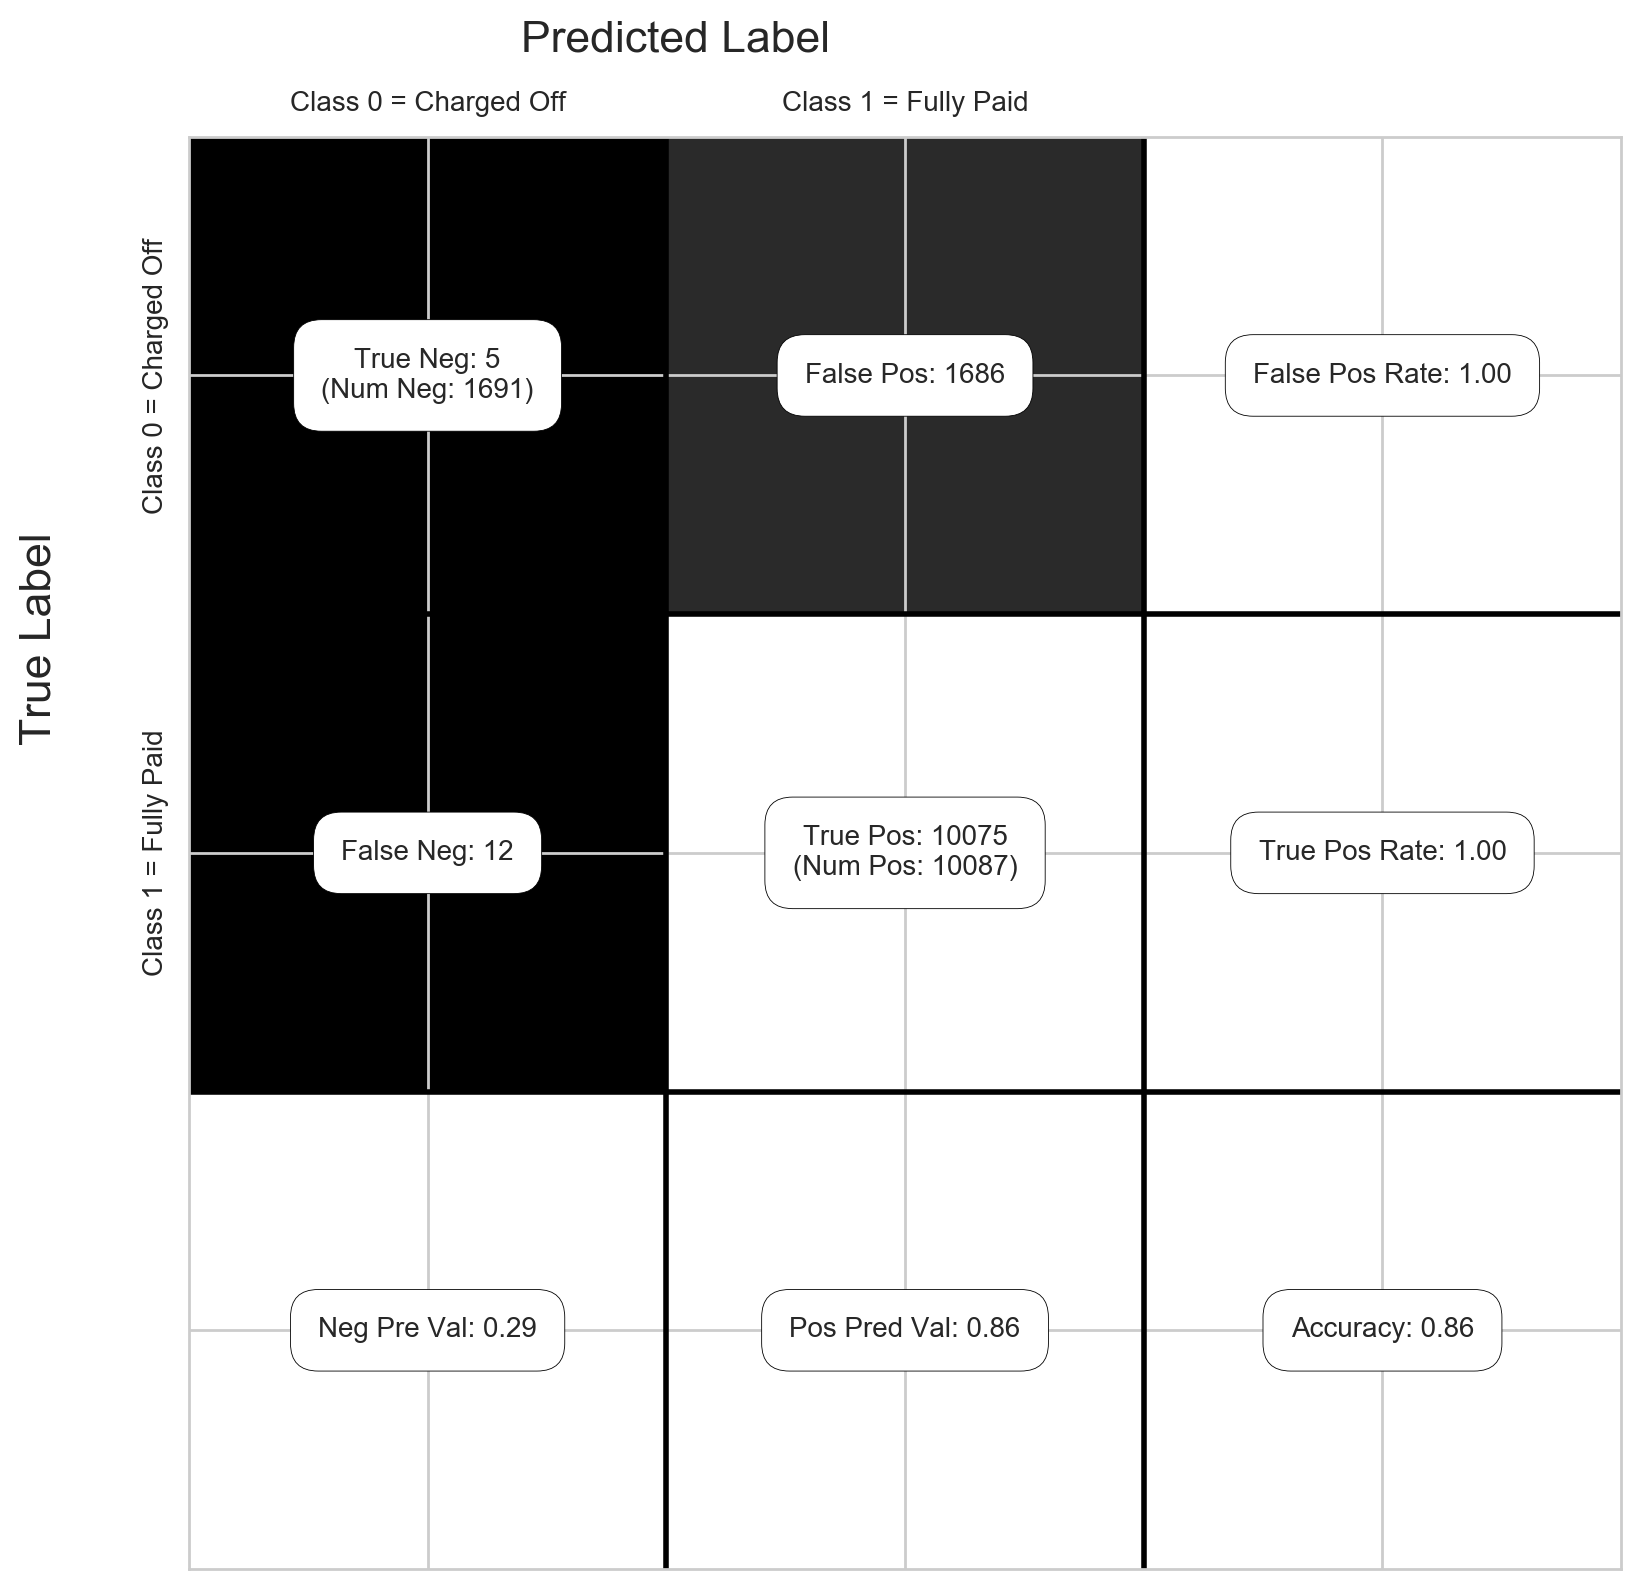

In [59]:
C = confusion_matrix(y_test, gsdt.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Charged Off', 'Class 1 = Fully Paid'])

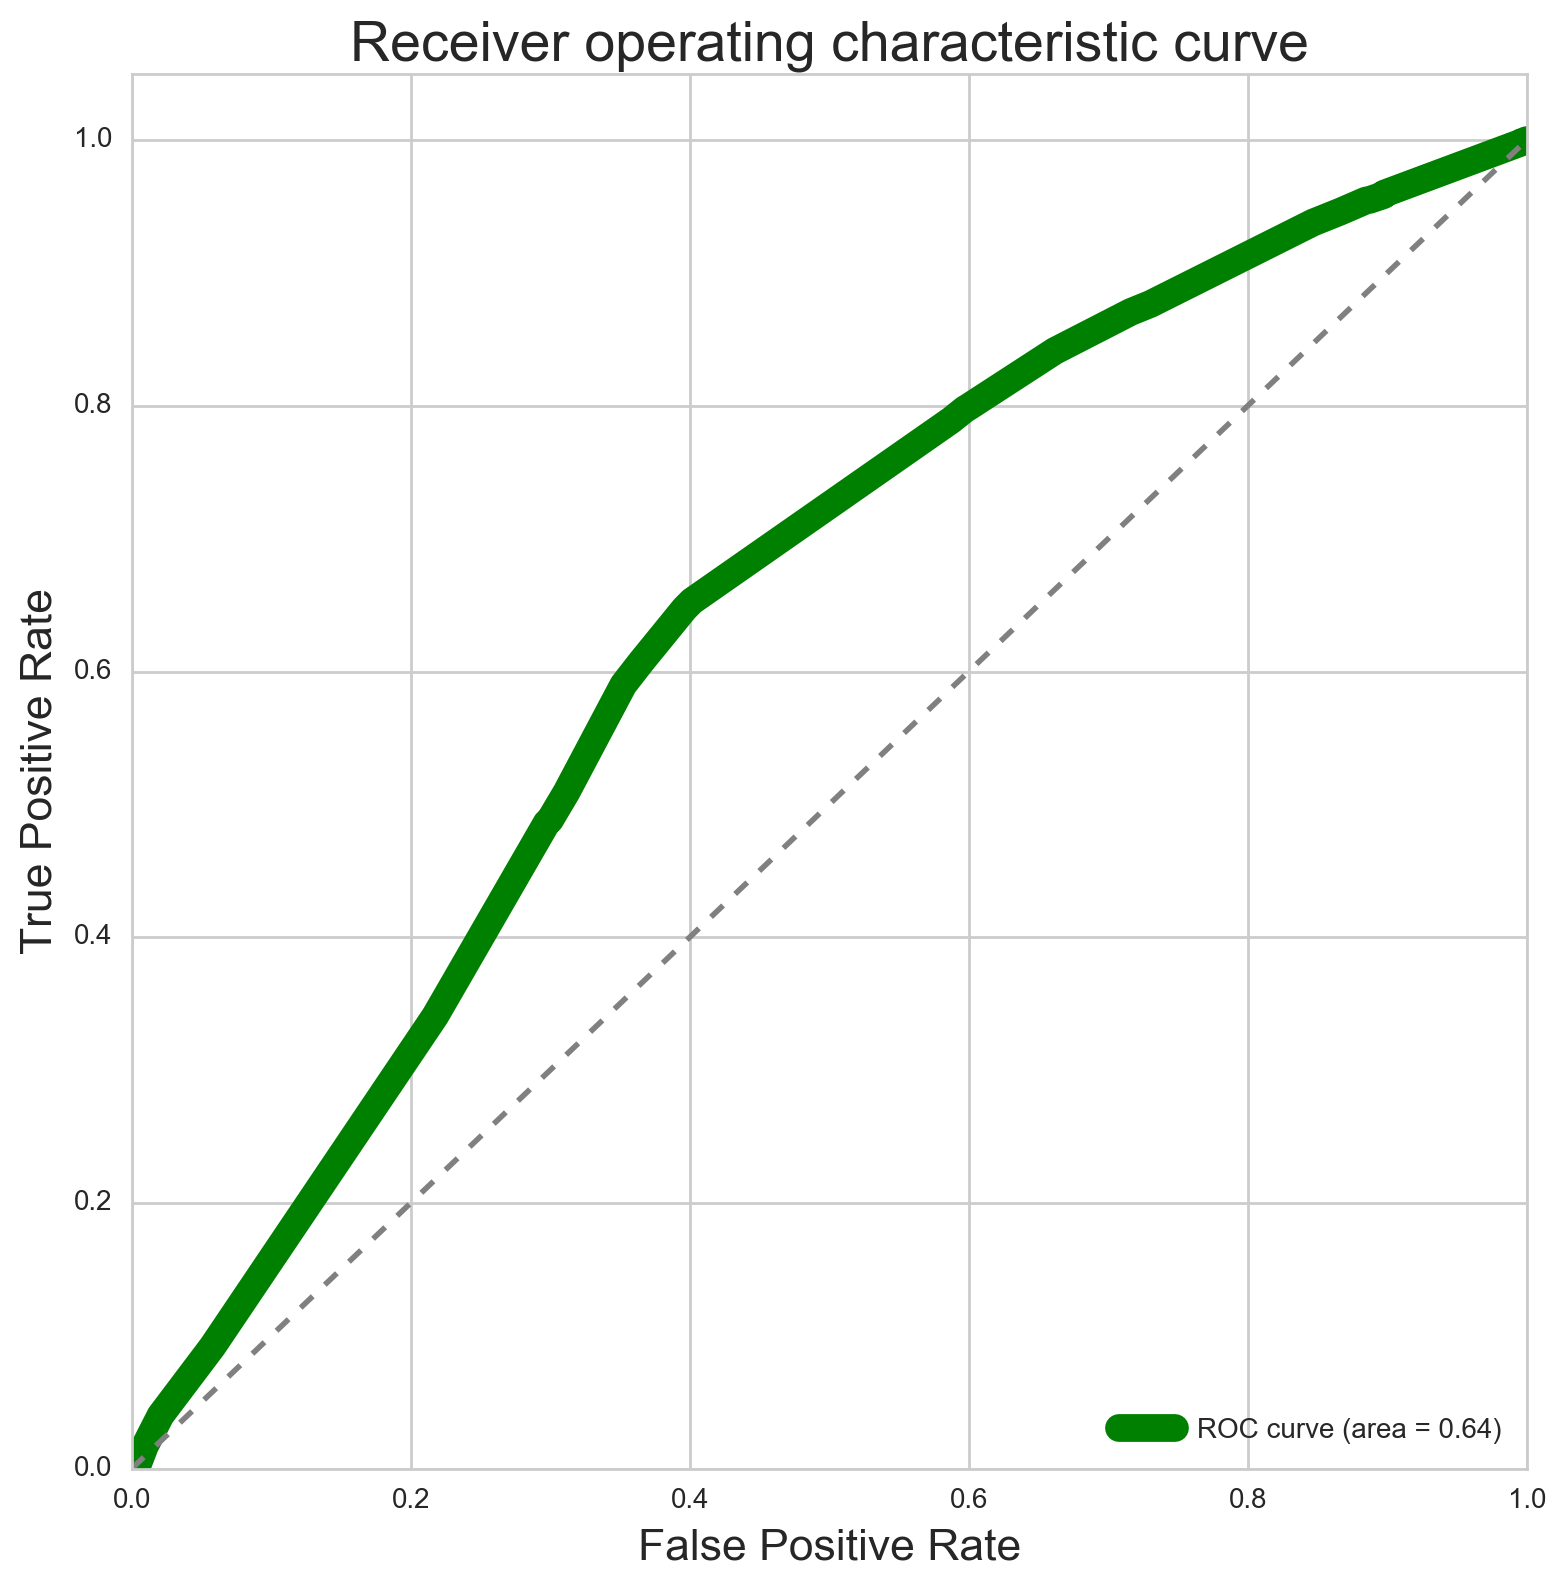

In [60]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = gsdt.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [61]:
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [62]:
feature_importance(X, dct_best)

,feature,importance
36,term_ 36 months,0.542531
3,grade,0.088539
13,fico_average,0.085864
0,loan_amnt,0.079465
8,inq_last_6mths,0.037565
14,home_ownership_MORTGAGE,0.024859
2,installment,0.022134
1,int_rate,0.021546
26,purpose_home_improvement,0.018634
12,total_acc,0.014528


In [63]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

Couldn't import dot_parser, loading of dot files will not be possible.


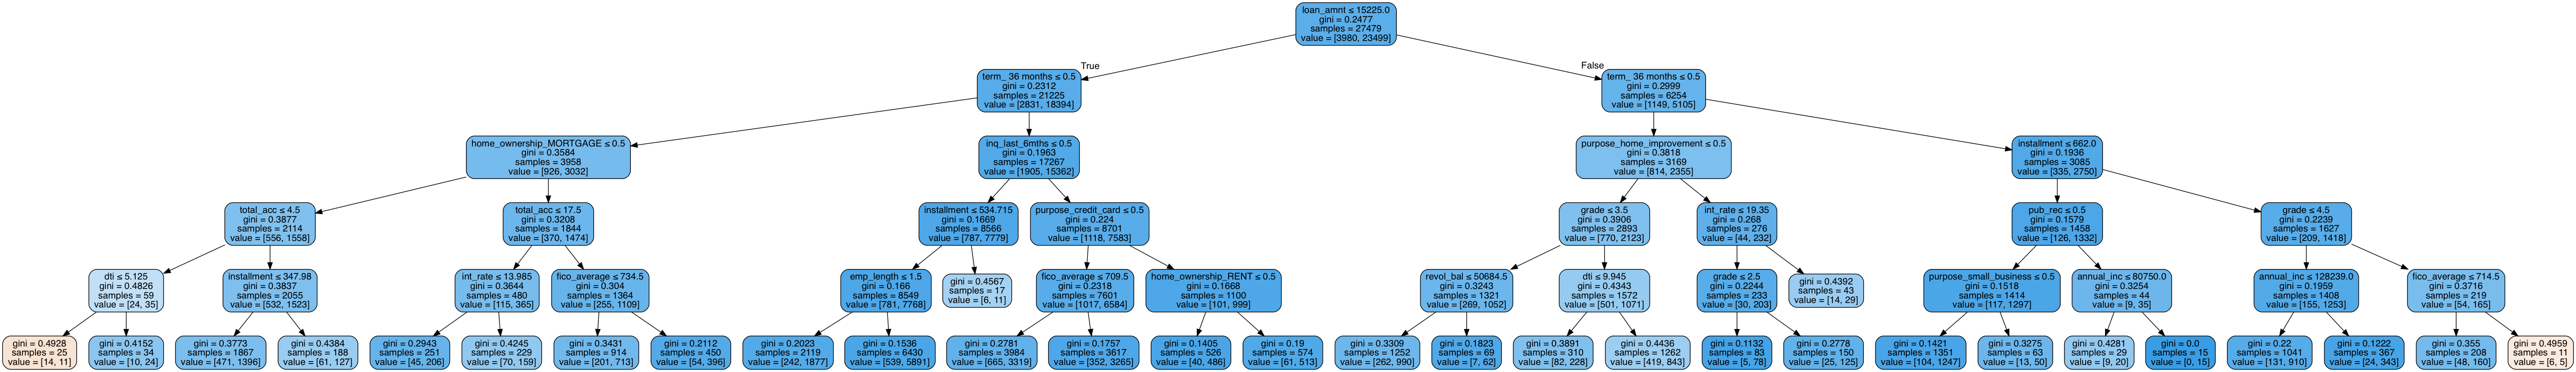

In [64]:
### visualize your tree

dot_data = StringIO()
''' dtr_best was defined before in section B'''

## Graph
export_graphviz(dct_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
## Define a Random Forest Classifier
rfc = RandomForestClassifier()

rf_params = {
    'max_features':[None,'log2','sqrt', 2,3,4,5],
    'max_depth':[1,2,3,None],
#     'min_samples_leaf':np.linspace(0, 101, 20),
    'n_estimators':[100]
}

## gridsearch parameters, and cv =5
rf_gs = GridSearchCV(rfc, rf_params, cv=5, verbose=1, n_jobs=-1)

In [67]:
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'n_estimators': [100], 'max_depth': [1, 2, 3, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

### Model Evaluation

In [68]:
rfc_best = rf_gs.best_estimator_
print "Best estimators on the left out data:\n", rfc_best
print ''

print "\nBest Params on hold out data (train):\n", rf_gs.best_params_
##Parameter setting that gave the best results on the hold out data.
print ''

print "\nBest Score on left out data:%.3f \n" % rf_gs.best_score_
## Score of best_estimator on the left out data.
print ''

Best estimators on the left out data:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Best Params on hold out data (train):
{'max_features': None, 'n_estimators': 100, 'max_depth': 1}


Best Score on left out data:0.855 




In [69]:
cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.29      0.00      0.01      1691
          1       0.86      1.00      0.92     10087

avg / total       0.78      0.86      0.79     11778



In [70]:
y_pred= rfc_best.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Charged Off', 'True_Label_1 Fully Paid'],
                         columns=['Predict_Label_0 Charge Off', 'Predict_Label_1 Fully Paid'])

confusion

,Predict_Label_0 Charge Off,Predict_Label_1 Fully Paid
True_Label_0 Charged Off,0,1691
True_Label_1 Fully Paid,0,10087


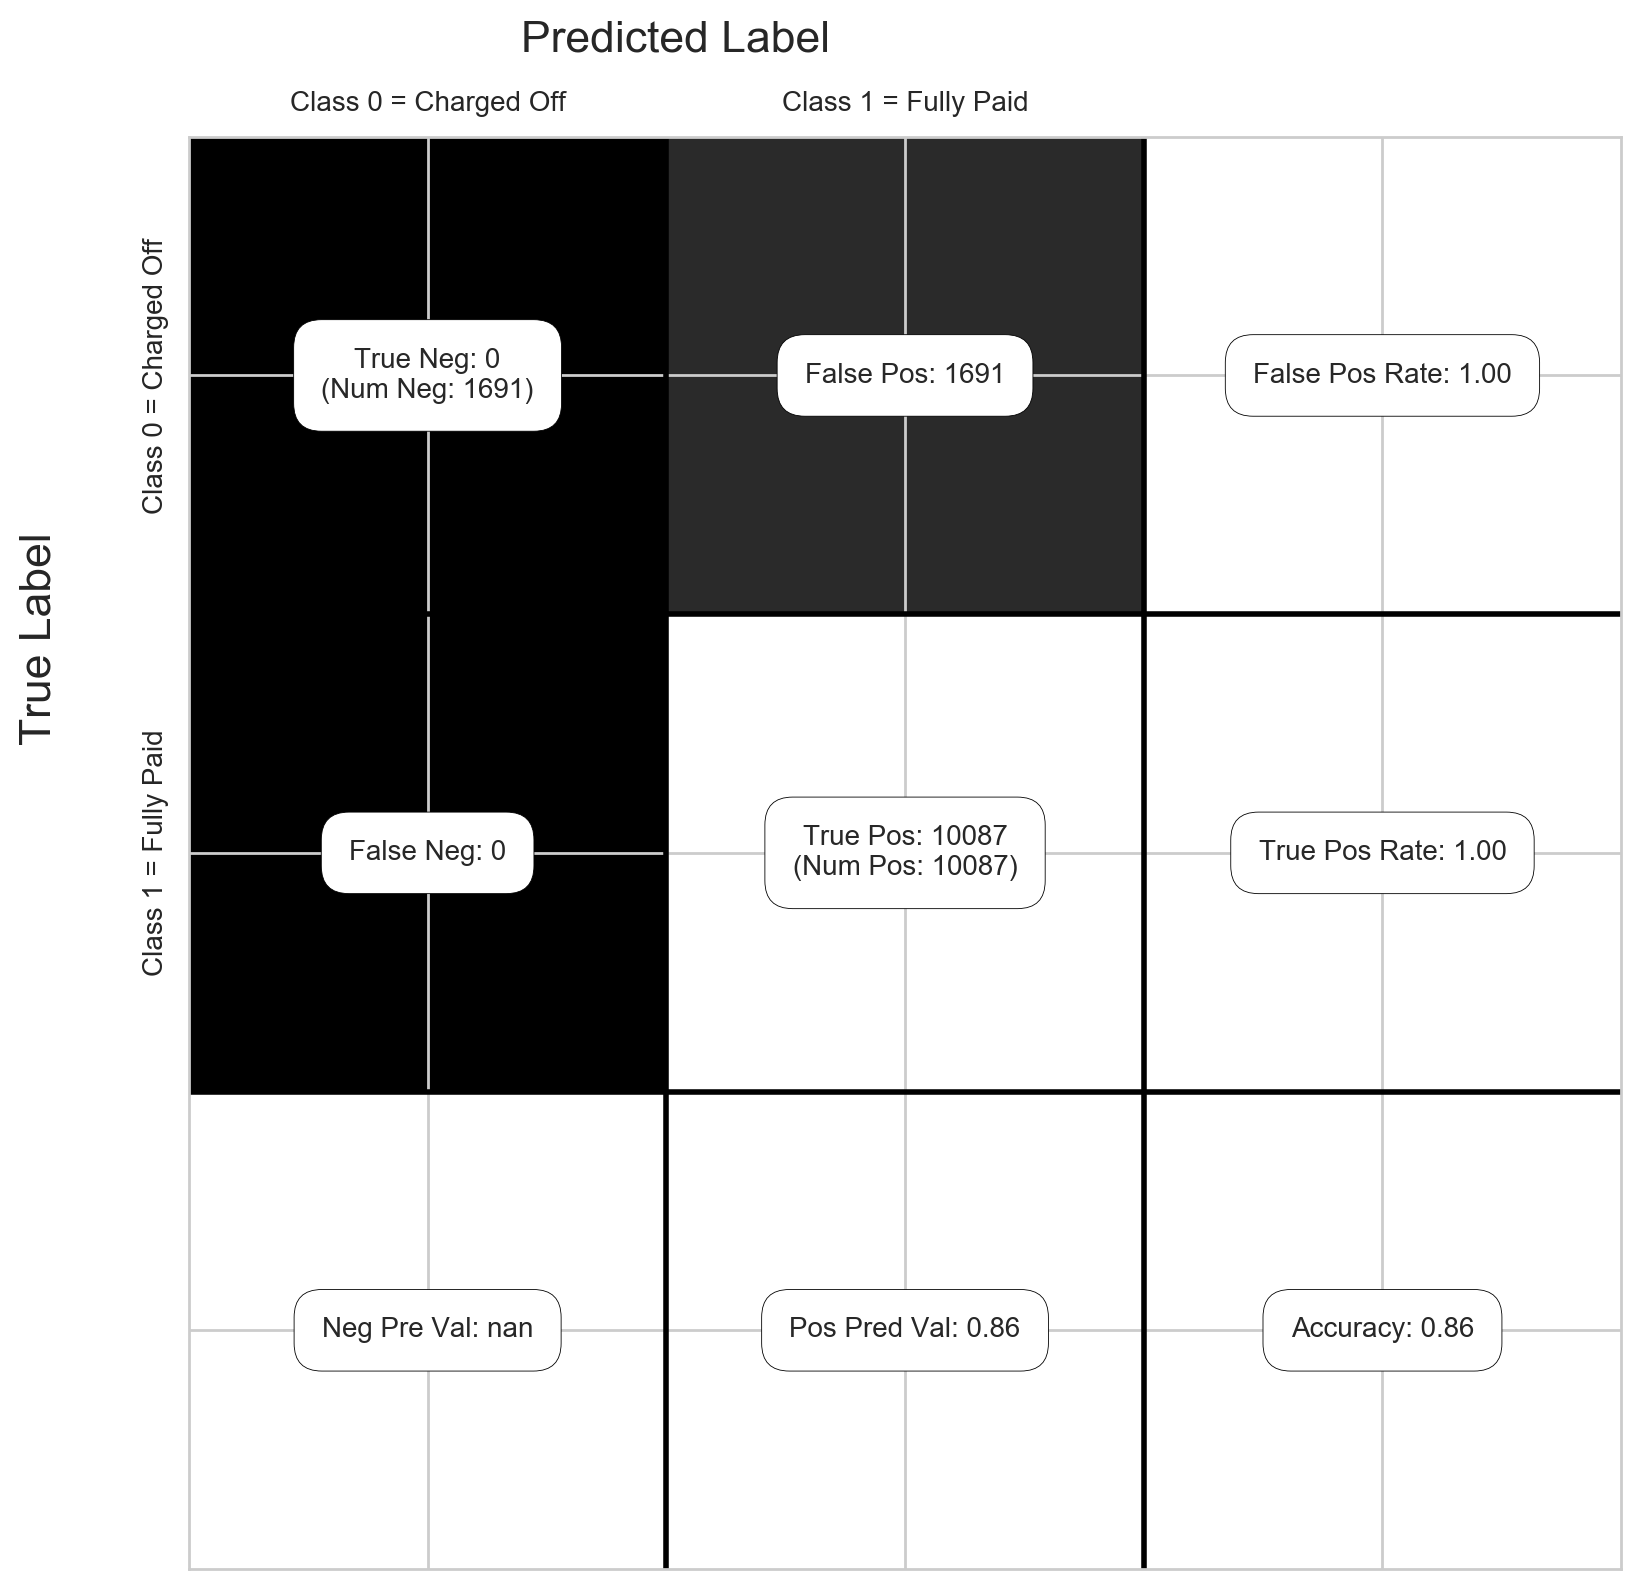

In [71]:
C = confusion_matrix(y_test, rf_gs.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Charged Off', 'Class 1 = Fully Paid'])

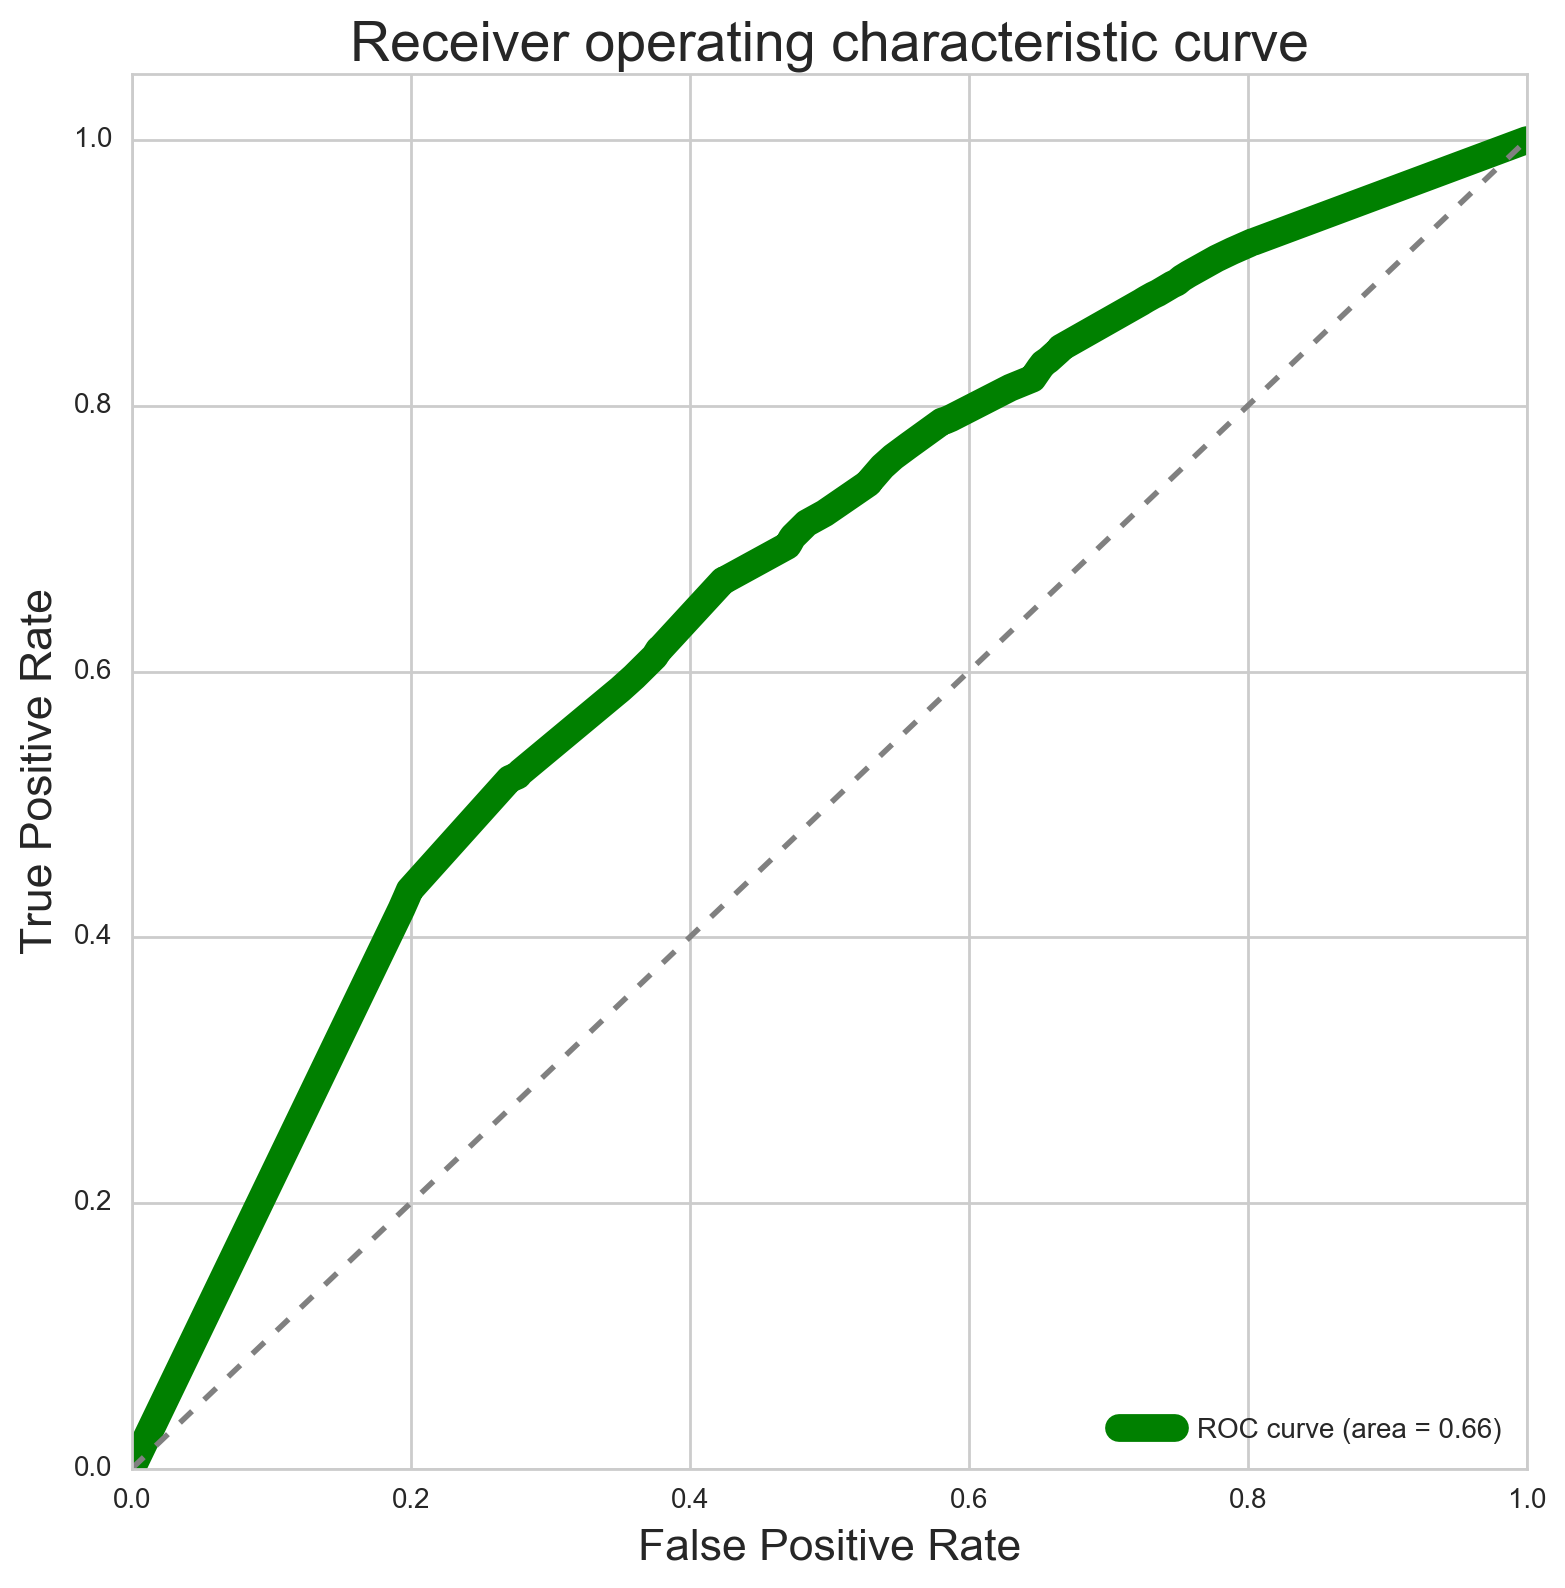

In [72]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = rf_gs.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [75]:
feature_importance(X, rfc_best)

,feature,importance
1,int_rate,0.50
3,grade,0.19
37,term_ 60 months,0.19
36,term_ 36 months,0.12
27,purpose_house,0.00
21,verification_status_Verified,0.00
22,purpose_car,0.00
23,purpose_credit_card,0.00
24,purpose_debt_consolidation,0.00
25,purpose_educational,0.00


# Part 3. Brief Analysis

In this study, I used ML models to predict Loan Status. As we know a good prediction could help the firm/investor/bank to avoid risk investments or untrustworthy borrowers.

#### Data Description: 
This dataset contains LC customers' loan information from 2007 to 2011.

### Technical Analysis

#### Some Findings in the EDA
##### Borrowing purpose -- A "hint" of Financial Crisis
1.In the EDA section, I found the top three borrowing purposes are "Debt Consolidation", "Credit Card" and "Home Improvement". This could be the scenario that some borrowers were not able to get loans from regulated banks due to the existing loan or borrowing history. Hence, these borrowers borrowed money from Lending Club (or other similar agencies) to pay off their existing loans.

##### Imbalance Data -- what does this mean, and how to deal with it?
2.Let's recall the pie chart in the EDA section. About 85% of loans status are "Fully Paid", however, "Late payments" are just about 15%. The imbalance data leads to an overfitting "1" prediction and an underfitting "0" prediction. It's difficult to correctly predict the 0s due to the limited sample size. Here are some potential methods to solve this problem:

a). Resampling the Data


b). Penalized Models


c). Try different metrics

I've decided to not use any re-sampling methods in this study, became any resampling will create the systematic error.

#### Machine Learing V.S. Logit Regression

Logistic Regression Grid Search suggests that L1 was the best estimation, which is Ridge. Compared to the Decision Tree and Random Forest, Logistic regression shows a better ROC curve. Moreover, logistic regression was the one that predicted most 0s. According to the estimation scores, three models are almost the same. Intuitively, the important features that Decision Tree suggested were more reliable. 

### Stata Check -- Logit Regression
#### Based on the important features
As the result below we can see that all coefficients are significant at 90%, except grade, FICO score and home ownershiop. Again, we had the same "imbalance" problem due to the limited 0s in the sample. The difference between specificity and sensitivity are quite large. Moreover, the omitted variables could be another reason for this unbalanced result.

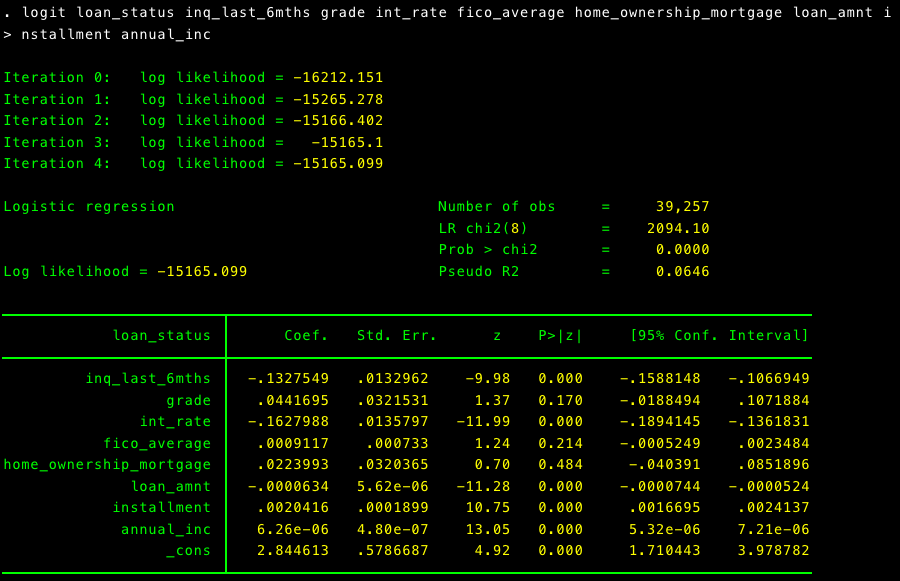

In [83]:
from IPython.display import Image
Image("/Users/zerindong/Desktop/Picture1.png")

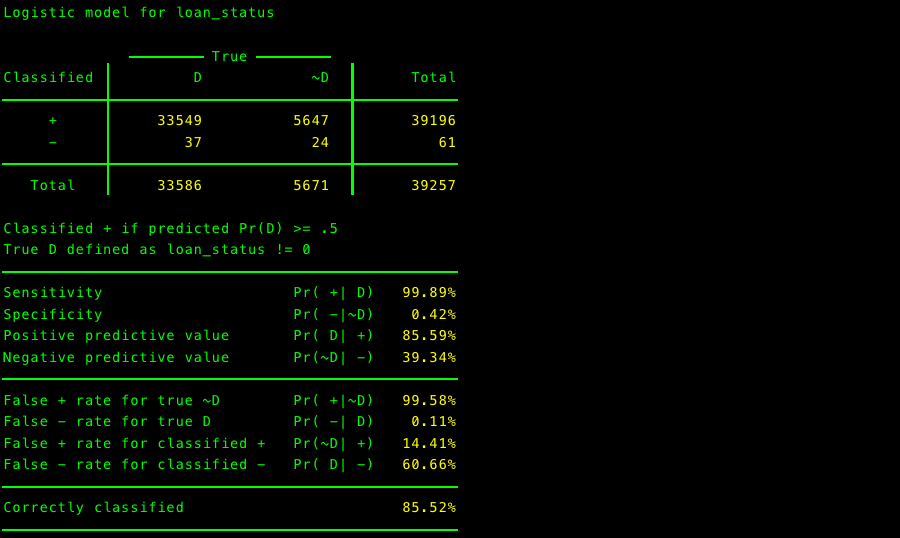

In [84]:
from IPython.display import Image
Image("/Users/zerindong/Desktop/Picture2.png")

### Non-Technical Analysis

#### What are the factors that affecting loan status?
Based on the important feature ranking that DT and RF suggested, we can see the features that would affect the loan status are:

1. int_rate: Interest rate on loan (higer interest rate == risky investment/borrowers)
2. grade: Loan grade (A-F: 1-6; small number == better score == less risky == more likely to pay back the borrowing)
3. term: The number of payments on the loan.  (Longer term == Higher risk)
4. fico_average: The average of FICO score (Negative, high FICO == less risk)
5. home_ownership_mortgage: Home ownership (The borrowers who have mortgage loan tend to make a late payment/ not paying back the loan)
6. ing_last_6months: The number of inquiries in the past 6 months. ( The borrowers have questionary records in the past 6 months are more risky than the people do not have bad records.)

#### Where to applied?
Lending angencies or banks could use ML model to filter out risky investments/clients, hence to avoid late payments/bad loans.

### Conclusion and Limitation

Unfortunately, the estimated model are not ideal due to the limited sample. There are some methods to deal with an imbalance dataset, such as re-sampling, re-weight the samples, etc. However, these methods were not able to be adopted in this scenario. Furthermore, some important variables were excluded in the regression. 

##### Suggestion:
Always be aware of the greedy algorithms. However, it decentralizes the causalities among the variables. And we know causality is an important key to a good Econometrics Report. 